<a href="https://colab.research.google.com/github/Ailla19/Mendoza_CSST104-3A/blob/main/3A_Exer7_Mendoza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Data Preprocessing


In [ ]:
import pandas as pd
netflix_df = pd.read_csv("/content/Netflix_Userbase.csv")
print(netflix_df.info())
print(netflix_df.head())

missing_values = netflix_df.isnull().sum()
print("Missing Values:\n", missing_values)

netflix_df_encoded = pd.get_dummies(netflix_df, drop_first=True)
print(netflix_df_encoded.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
None
   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard             

Exploratory Data Analysis (EDA

          User ID  Monthly Revenue          Age  Subscription Type_Premium  \
count  2500.00000      2500.000000  2500.000000                 2500.00000   
mean   1250.50000        12.508400    38.795600                    0.29320   
std     721.83216         1.686851     7.171778                    0.45532   
min       1.00000        10.000000    26.000000                    0.00000   
25%     625.75000        11.000000    32.000000                    0.00000   
50%    1250.50000        12.000000    39.000000                    0.00000   
75%    1875.25000        14.000000    45.000000                    1.00000   
max    2500.00000        15.000000    51.000000                    1.00000   

       Subscription Type_Standard  Join Date_01-05-23  Join Date_01-06-22  \
count                 2500.000000           2500.0000         2500.000000   
mean                     0.307200              0.0004            0.001200   
std                      0.461425              0.0200            0

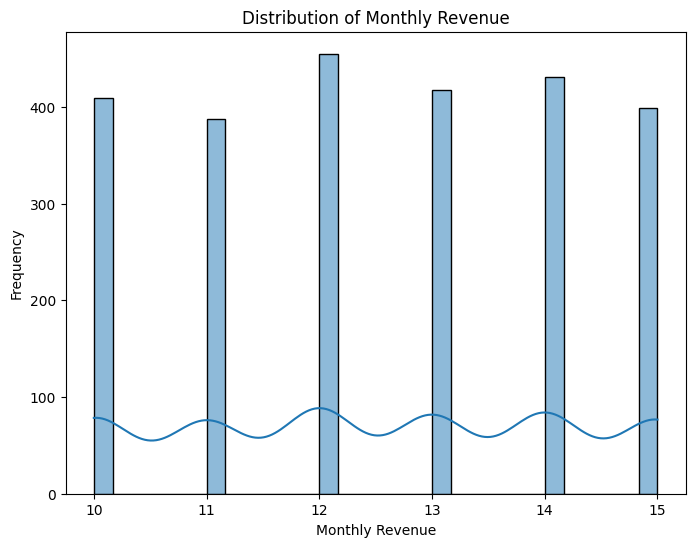

<ipython-input-14-036979befafa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df, x='Gender', palette='Set2')


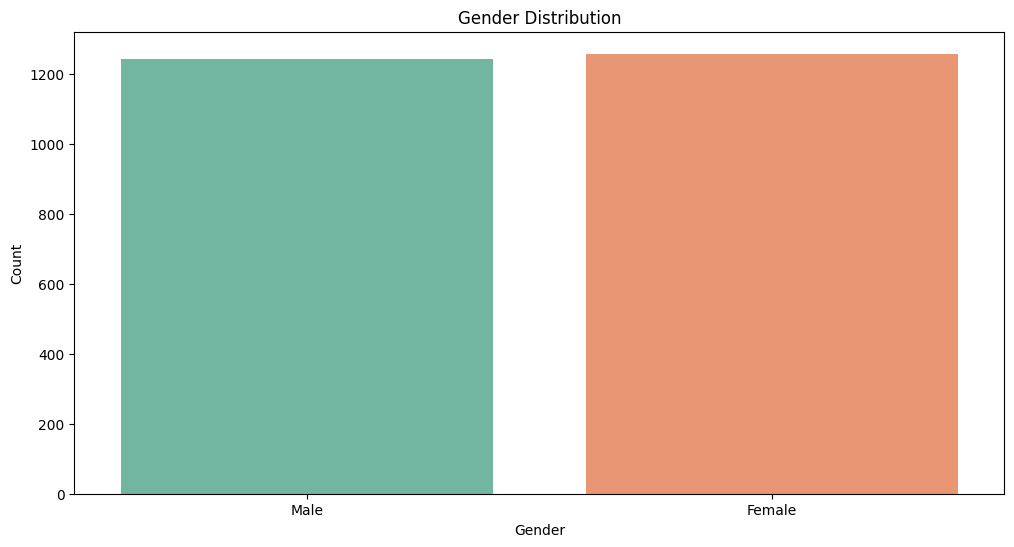

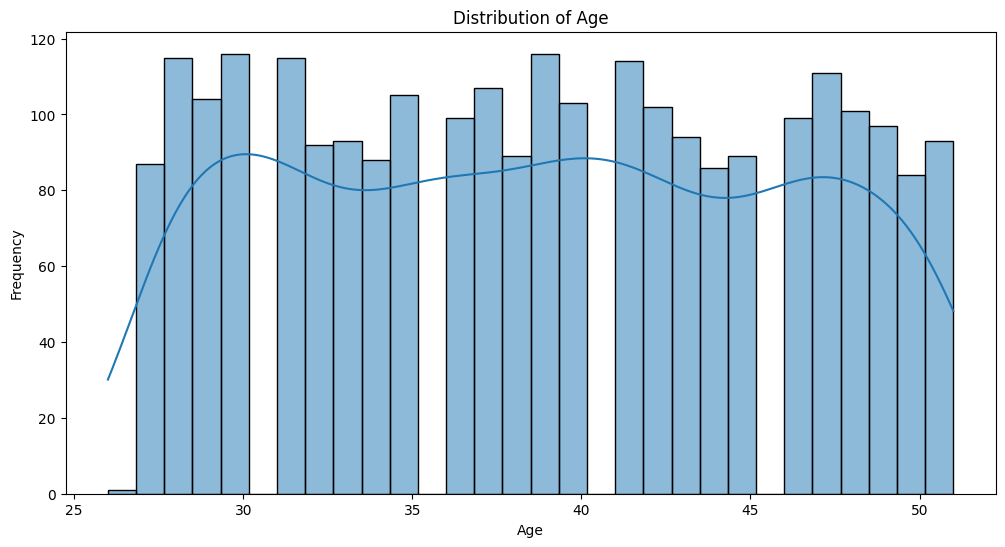

In [ ]:
print(netflix_df_encoded.describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=netflix_df_encoded, x='Monthly Revenue', bins=30, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_df, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=netflix_df_encoded, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Linear Regression Model (Predicting Monthly Revenue

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = netflix_df_encoded.drop(columns=['Monthly Revenue'])  # Features
y = netflix_df_encoded['Monthly Revenue']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared:", r2)
print("RMSE:", rmse)

R-squared: -3.871091437948156e+17
RMSE: 1034048279.4278576


Logistic Regression Model (Predicting Customer Feedback)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = netflix_df_encoded.drop(columns=['Subscription Type_Premium'])
y = netflix_df_encoded['Subscription Type_Premium']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.808
Precision: 0.6785714285714286
Recall: 0.6506849315068494
F1 Score: 0.6643356643356644
Confusion Matrix:
 [[309  45]
 [ 51  95]]


Comparative Analysis and Visualization

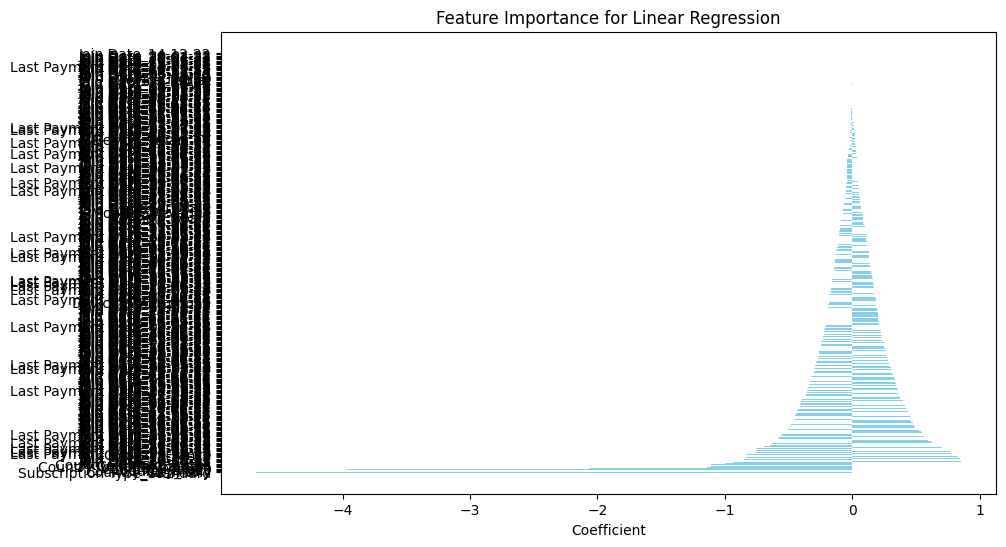

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

coefficients_1d = np.ravel(coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients_1d})
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Feature Importance for Linear Regression')
plt.show()
